##**ABSTRACT**
Fake Currency Detection is a task of binary classification in machine learning.In this project, we employ several supervised machine learning algorithms to build models that distinguish between genuine and counterfeit(fake) banknotes. We will analyze these algorithms to choose the best candidate, and then try to further optimize the algorithm to best model the data. Our goal with this implementation is to accurately predict whether a currency note is genuine or fake.

##**DATASET DESCRIPTION**
 The dataset contains these five input characteristics:

1.   The variance of the image transformed into wavelets
2.   The asymmetry of the image transformed into wavelets
3.   Kurtosis of the image transformed into wavelets
4.  Image entropy
5.   Target value  
   The target value is simply 0 for fake banknotes and 1 for real banknotes.
   
   There are 1372 rows and 5 attributes in this dataset




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns


%matplotlib inline

data = pd.read_csv("bank_notes.csv")
display(data.head(n=6))

classes = data['Target']
features = data.drop('Target', axis=1)

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0
5,4.36840,9.6718,-3.9606,-3.16250,0


#EXPLORATORY DATA ANALYSIS

In [ ]:
n_records = len(data)
n_fake_notes = len(data[data['Target'] == 0])
n_real_notes = len(data[data['Target'] == 1])
print ("Total number of records: {}".format(n_records))
print ("Total number of fake notes: {}".format(n_fake_notes))
print ("Total number of real notes: {}".format(n_real_notes))

missing_values = data.isnull().sum().sum()
if missing_values == 0:
    print ("\nThere are no missing values in the dataset")
else:
    print("\nThe dataset has {} missing values".format(missing_values))

Total number of records: 1372
Total number of fake notes: 762
Total number of real notes: 610

There are no missing values in the dataset


In [ ]:
display(data.describe())

,variance,skewness,curtosis,entropy,Target
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   Target    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


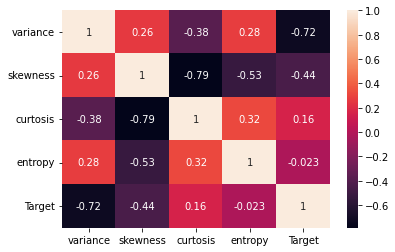

In [ ]:
heatmp = data.corr()
sns.heatmap(heatmp,annot=True)

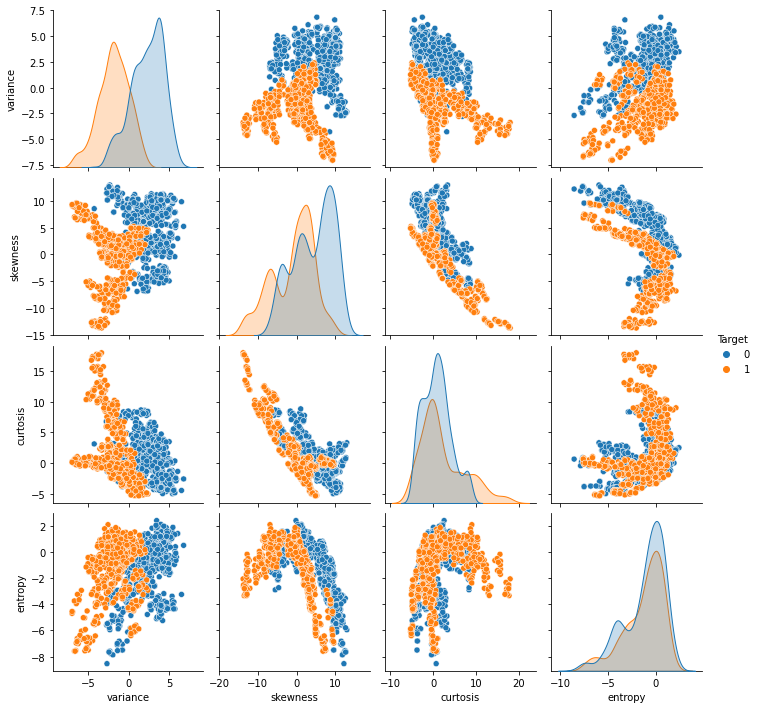

In [ ]:
sns.pairplot(data,hue='Target')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


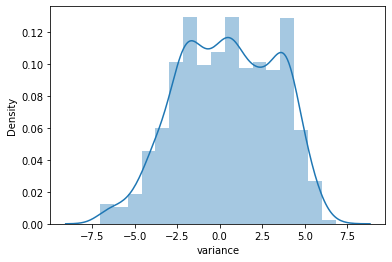

In [ ]:
sns.distplot(data.variance)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


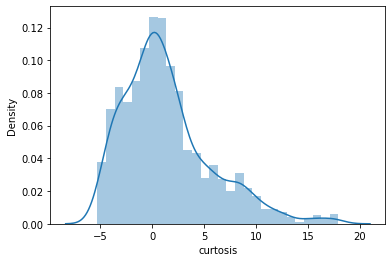

In [ ]:
sns.distplot(data.curtosis)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


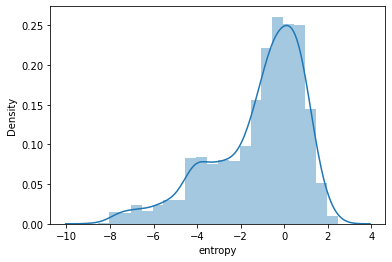

In [ ]:
sns.distplot(data.entropy)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


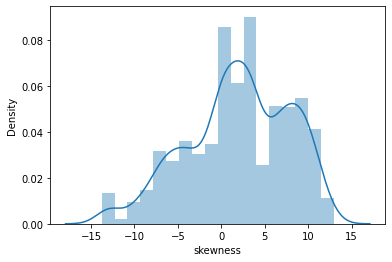

In [ ]:
sns.distplot(data.skewness)

#Normalizing Numerical Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
numerical = ['variance', 'skewness', 'curtosis', 'entropy']
scaler = MinMaxScaler()
features[numerical] = scaler.fit_transform(features[numerical])

display(features.head(n = 6))

,variance,skewness,curtosis,entropy
0,0.769004,0.839643,0.106783,0.736628
1,0.835659,0.820982,0.121804,0.644326
2,0.786629,0.416648,0.310608,0.786951
3,0.757105,0.871699,0.054921,0.450440
4,0.531578,0.348662,0.424662,0.687362
5,0.822859,0.877275,0.057100,0.489711


In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'classes' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, classes, test_size = 0.4, random_state = 5)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 823 samples.
Testing set has 549 samples.


#Using Naive Bayes Classifier

In [ ]:
# Calculate Accuracy
accuracy = float(n_fake_notes)/n_records

# Calculate F-Score with beta = 2
precision = accuracy
recall = 1
beta = 2
fscore = (1 + beta ** 2) * precision * recall /(beta ** 2 * precision + recall)

# Print the results 
print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.5554, F-score: 0.8620]


#Supervised Learning Models

In [ ]:
y=data['Target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [ ]:
X=data.drop('Target',axis=1)

In [ ]:
feat = pd.DataFrame(X)

#Decision tree

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feat, y, test_size=0.40,stratify=y )
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train,y_train)
prediction = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print (confusion_matrix(y_test,prediction))
print('\n')
print (classification_report(y_test,prediction))
print('\n')
print (accuracy_score(y_test,prediction))
print('\n')
print ('Accuracy on training set:{:.3f}'.format(dtree.score(X_train,y_train)))
print ('Accuracy on training set:{:.3f}'.format(dtree.score(X_test,y_test)))

[[295  10]
 [ 10 234]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       305
           1       0.96      0.96      0.96       244

    accuracy                           0.96       549
   macro avg       0.96      0.96      0.96       549
weighted avg       0.96      0.96      0.96       549



0.9635701275045537


Accuracy on training set:1.000
Accuracy on training set:0.964


Text(0, 0.5, 'second PC')

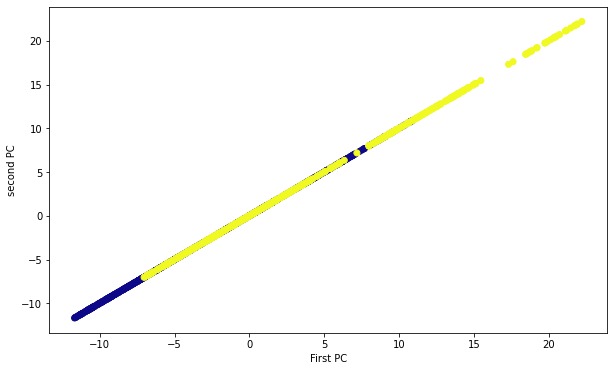

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
x_pca= pca.transform(X)
x_pca.shape
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,0],c=y,cmap='plasma')
plt.xlabel('First PC')
plt.ylabel('second PC')

#Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradt=GradientBoostingClassifier(random_state=0,max_depth=3)
gradt.fit(X_train,y_train)
grade_pred = gradt.predict(X_test)
print(confusion_matrix(y_test,grade_pred))
print('\n')
print(classification_report(y_test,grade_pred))
print('\n')
print(accuracy_score(y_test,grade_pred))
print ('Accuracy on training set:{:.3f}'.format(gradt.score(X_train,y_train)))
print ('Accuracy on testing set:{:.3f}'.format(gradt.score(X_test,y_test)))

[[304   1]
 [  0 244]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       305
           1       1.00      1.00      1.00       244

    accuracy                           1.00       549
   macro avg       1.00      1.00      1.00       549
weighted avg       1.00      1.00      1.00       549



0.9981785063752276
Accuracy on training set:1.000
Accuracy on testing set:0.998


# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=12)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print (confusion_matrix(y_test,rfc_pred))
print('\n')
print (classification_report(y_test,rfc_pred))
print('\n')
print (accuracy_score(y_test,rfc_pred))

[[303   2]
 [  2 242]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       305
           1       0.99      0.99      0.99       244

    accuracy                           0.99       549
   macro avg       0.99      0.99      0.99       549
weighted avg       0.99      0.99      0.99       549



0.9927140255009107


In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data
d_scale = pd.DataFrame(scaled_data,columns=list(X))
# decision tree for scaled data
X_train, X_test, y_train, y_test = train_test_split(d_scale, data['Target'], test_size=0.3,stratify=data['Target'])
dtree.fit(X_train,y_train)
scale_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,scale_pred))
print('\n')
print(classification_report(y_test,scale_pred))
print('\n')
print(accuracy_score(y_test,scale_pred))
print ('Accuracy on training set:{:.3f}'.format(dtree.score(X_train,y_train)))
print ('Accuracy on testing set:{:.3f}'.format(dtree.score(X_test,y_test)))

[[225   4]
 [  2 181]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       229
           1       0.98      0.99      0.98       183

    accuracy                           0.99       412
   macro avg       0.98      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



0.9854368932038835
Accuracy on training set:1.000
Accuracy on testing set:0.985


#SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
svc = SVC()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
svc.fit(X_train, y_train)

pred = svc.predict(scaler.transform(X_test))

class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n",acc)
results = []
results.append(("SVC",class_report, conf_matrix, acc))
     

Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

Confusion Matrix
 [[157   0]
 [  0 118]]

Accuracy
 1.0


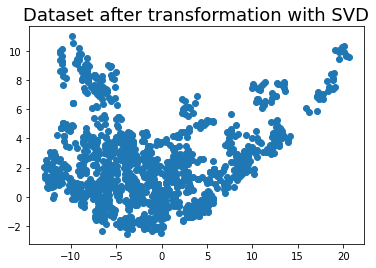

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 2, random_state = 0)

transf = svd.fit_transform(X)

plt.scatter(x = transf[:,0], y = transf[:,1])
plt.title("Dataset after transformation with SVD", fontsize = 18)
plt.show()
     

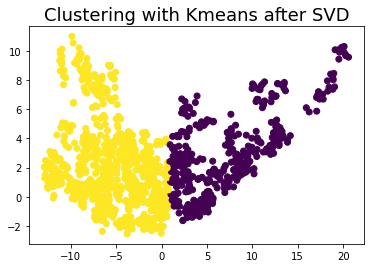

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 2)
c = km.fit_predict(transf)

plt.scatter(x = transf[:,0], y = transf[:,1], c = c)
plt.title("Clustering with Kmeans after SVD", fontsize = 18)
plt.show()

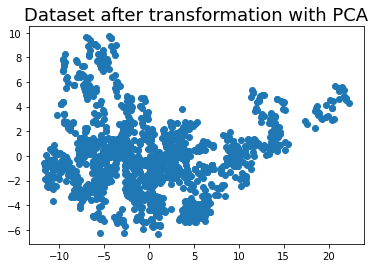

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state = 0)

transf = pca.fit_transform(X)

plt.scatter(x = transf[:,0], y = transf[:,1])
plt.title("Dataset after transformation with PCA", fontsize = 18)
plt.show()

#KNN

In [ ]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    beta=2
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set,
    # then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta)
    
    # Compute Confusion Matrix
    results['conf_mat'] = confusion_matrix(y_test, predictions_test)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
acc_scores = []
fbeta_scores = []
k_range = range(1,16)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc_scores.append(accuracy_score(y_test,y_pred))
    fbeta_scores.append(fbeta_score(y_test, y_pred, beta=2))
for i in range(len(acc_scores)):
    print ("{}: Accuracy is {}, f-score is {}".format(i+1,acc_scores[i], fbeta_scores[i]))

1: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
2: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
3: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
4: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
5: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
6: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
7: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
8: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
9: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
10: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
11: Accuracy is 0.9890710382513661, f-score is 0.995297805642633
12: Accuracy is 0.9890710382513661, f-score is 0.995297805642633
13: Accuracy is 0.9890710382513661, f-score is 0.995297805642633
14: Accuracy is 0.9890710382513661, f-score is 0.995297805642633
15: Accuracy is 0.9890710382513661, f-score is 0.995297805642633


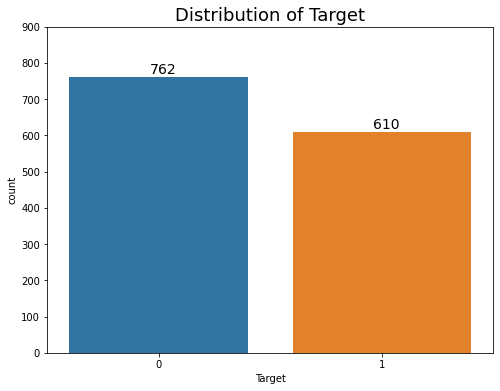

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Target', size=18)
sns.countplot(x=data['Target'])
target_count = data.Target.value_counts()
plt.annotate(s=target_count[0], xy=(-0.04,10+target_count[0]), size=14)
plt.annotate(s=target_count[1], xy=(0.96,10+target_count[1]), size=14)
plt.ylim(0,900)
plt.show()

##Data preprocessing

In [ ]:
nb_to_delete = target_count[0] - target_count[1]
data = data.sample(frac=1, random_state=42).sort_values(by='Target')
data = data[nb_to_delete:]
print(data['Target'].value_counts())

0    610
1    610
Name: Target, dtype: int64


In [ ]:
x = data.loc[:, data.columns != 'Target']
y = data.loc[:, data.columns == 'Target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

scalar = StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

RESULTS:
1.SVM has highest accuracy with 100%

2.All supervised learning models show good accuracy percentage

3.Naive bayes classification has least accuracy

#LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
clf = LogisticRegression(solver='lbfgs', random_state=42, multi_class='auto')
clf.fit(x_train, y_train.values.ravel())

y_pred = np.array(clf.predict(x_test))
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                        columns=["Pred.Negative", "Pred.Positive"],
                        index=['Act.Negative', "Act.Positive"])
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = round((tn+tp)/(tn+fp+fn+tp), 4)
print(conf_mat)
print(f'\n Accuracy = {round(100*accuracy, 2)}%')

              Pred.Negative  Pred.Positive
Act.Negative            187              6
Act.Positive              0            173

 Accuracy = 98.36%


In [ ]:
new_banknote = np.array([4.5, -8.1, 2.4, 1.4], ndmin=2)
new_banknote = scalar.transform(new_banknote)
print(f'Prediction:  Class{clf.predict(new_banknote)[0]}')
print(f'Probability [0/1]:  {clf.predict_proba(new_banknote)[0]}')

Prediction:  Class0
Probability [0/1]:  [0.61112576 0.38887424]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Result: Given banknote is real

#Image processing

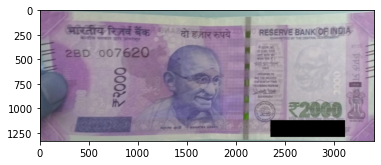

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
 
A = cv2.imread('Real.jpg')
P = cv2.imread('fake.jpg')
plt.imshow(A)


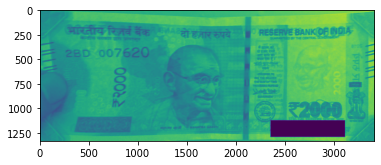

In [ ]:
a = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)
p = cv2.cvtColor(P, cv2.COLOR_BGR2GRAY)
plt.imshow(a)

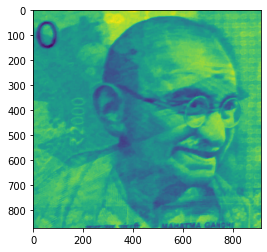

In [ ]:
a2tr = a[330:1200, 1016:1927]
plt.imshow(a2tr)

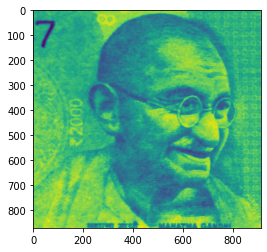

In [ ]:
b2tr = p[170:1040, 716:1627]
plt.imshow(b2tr)

(1332, 3416)


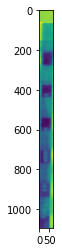

In [ ]:
print(a.shape)
a2_str = a[5:1100, 2080:2151]
plt.imshow(a2_str)

(1100, 3000)


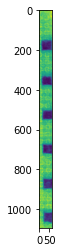

In [ ]:
print(p.shape)
p2_str = p[5:1100, 1666:1729]
plt.imshow(p2_str)

In [ ]:
hsvImageReal = cv2.cvtColor(A, cv2.COLOR_BGR2HSV)
hsvImageFake = cv2.cvtColor(P, cv2.COLOR_BGR2HSV)

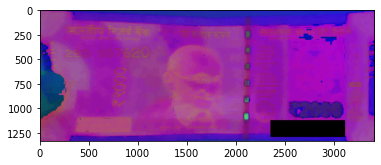

In [ ]:
plt.imshow(hsvImageReal)

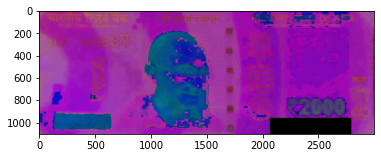

In [ ]:
plt.imshow(hsvImageFake)

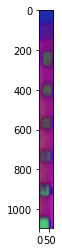

In [ ]:
croppedImageReal = hsvImageReal[5:1100, 2080:2151]
plt.imshow(croppedImageReal)

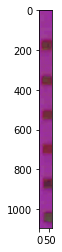

In [ ]:
croppedImageFake = hsvImageFake[5:1100, 1666:1729]
plt.imshow(croppedImageFake)

In [ ]:
satThresh = 0.3
valThresh = 0.9
g = croppedImageReal[:,:,1]>satThresh
h = croppedImageReal[:,:,2] < valThresh
 
g1 = croppedImageFake[:,:,1]>satThresh
h1 = croppedImageFake[:,:,2] < valThresh
BWImageReal = g&h
BWImageFake = g1&h1

In [ ]:
def bwareaopen(img, min_size, connectivity=8):
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
        img, connectivity=connectivity)
    
    for i in range(num_labels):
        label_size = stats[i, cv2.CC_STAT_AREA]
            
        if label_size < min_size:
            img[labels == i] = 0
            
    return img

In [ ]:
binr = cv2.threshold(a2_str, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
kernel = np.ones((3, 3), np.uint8)
invert = cv2.bitwise_not(binr)
BWImageCloseReal = cv2.morphologyEx(invert, cv2.MORPH_GRADIENT, kernel)

In [ ]:
binr2 = cv2.threshold(p2_str, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
kernel2 = np.ones((3, 3), np.uint8)
invert2 = cv2.bitwise_not(binr2)
BWImageCloseFake = cv2.morphologyEx(invert2, cv2.MORPH_GRADIENT, kernel2)

In [ ]:
areaopenReal = bwareaopen(BWImageCloseReal, 15);
areaopenFake = bwareaopen(BWImageCloseFake, 15);
bw = areaopenReal
labels = np.zeros(bw.shape)
countReal = cv2.connectedComponentsWithStats(bw, labels,8);

In [ ]:
bw2 = areaopenFake
labels2 = np.zeros(bw2.shape)
countFake = cv2.connectedComponentsWithStats(bw2, labels2,8);

In [ ]:
def corr2(A, B):
    
    A_mA = A - A.mean(1)[:, None]
    B_mB = B - B.mean(1)[:, None]
 
    ssA = (A_mA**2).sum(1)
    ssB = (B_mB**2).sum(1)
 
    return np.dot(A_mA, B_mB.T) / np.sqrt(np.dot(ssA[:, None],ssB[None]))

In [ ]:
co=corr2 (a2tr, b2tr)
if (co.any()>=0.5):
    print ('correlevance of gandhi > 0.5')
    if (countReal[0] == countFake[0] ):
        print ('currency is legitimate')
else:
    print ('correlevance of gandhi < 0.5')
    print ('currency is fake')

correlevance of gandhi > 0.5


RESULT:-
Given currency note is genuine or real